# Clusterização da Grande Base

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

In [2]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/develop/data/Grande%20Base%203.csv'

df_inicial = pd.read_csv(uri, encoding='latin-1')

## Análises Gerais

In [49]:
df = df_inicial.copy()
df =df.drop(columns=['CD_AREA_AVALIACAO','Qtd_Financiadores','Unnamed: 0'])
df.head()

CD_PROGRAMA_IES  AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  \
0   10001018002P1     2013                  3                 25           10   
1   10001018002P1     2014                  3                 22            8   
2   10001018002P1     2015                  3                 22            8   
3   10001018002P1     2016                  3                 20            7   
4   10001018002P1     2017                  4                 22            8   

   IB_Homens  IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
0         15              25                0                      16   
1         14              22                0                      16   
2         14              22                0                      15   
3         13              20                0                      14   
4         14              22                0                      16   

   IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  \
0                        9                         0                   25   
1                        6                         0                   22   
2                        5                         2                   22   
3                        4                         2                   20   
4                        4                         2                   22   

   IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
0                       0                        23   
1                       0                        20   
2                       0                        20   
3                       0                        18   
4                       0                        20   

   IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
0                           2                      12   
1                           2                      12   
2                           2                      12   
3                           2                      11   
4                           2                      12   

   IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  IB_Profs_Aposentados  \
0                            8                    2                     3   
1                            7                    0                     3   
2                            9                    0                     1   
3                            8                    0                     1   
4                            9                    0                     1   

   IB_Profs_BolsaDeFixacao  IB_Total_cursos  MEDIA_CONCEITO_CURSO  \
0                        0                2                   3.0   
1                        0                2                   3.0   
2                        0                2                   3.0   
3                        0                2                   3.0   
4                        0                2                   4.0   

   ID_SUBTIPO_PRODUCAO NM_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  \
0                  2.0                TESE                     0.0   
1                  2.0                TESE                     1.0   
2                  2.0                TESE                     0.0   
3                  2.0                TESE                     0.0   
4                  2.0                TESE                     1.0   

   NR_PAGINAS  GUS_Lingua_estrangeira  GUS_Quantidade_Trabalhos  \
0         NaN                       0                        21   
1        80.0                       0                        13   
2         NaN                       0                        20   
3         NaN                       0                        18   
4         NaN                       0                        21   

   GUS_Do_Homens  GUS_Do_Mulheres  GUS_Do_Brasileiros  GUS_Do_Estrangeiros  \
0             15               10                  25                    0   
1             14                8                  22                    0   
2  

In [50]:
df.rename(columns={'OUTRO AUXÃÂLIO FINANCEIRO': 'OUTRO_AUXILIO_FINANCEIRO', 'SEM AUXÃÂLIO': 'SEM_AUXILIO', 'PÃÂBLICA_OU_PRIVADA':'PUBLICA_OU_PRIVADA'}, inplace = True)

## Analisando a variável alvo

In [5]:
df[df['CONCEITO_PROGRAMA'] != 7].describe()

AN_BASE  CD_AREA_AVALIACAO  CONCEITO_PROGRAMA  IB_Total_docentes  \
count  19223.000000       19223.000000       19223.000000       19223.000000   
mean    2015.662332          26.377985           4.021433          21.783072   
std        1.697176          14.538021           0.942504           9.991124   
min     2013.000000           1.000000           1.000000           5.000000   
25%     2014.000000          13.000000           3.000000          15.000000   
50%     2016.000000          27.000000           4.000000          19.000000   
75%     2017.000000          41.000000           5.000000          25.000000   
max     2018.000000          50.000000           6.000000         106.000000   

        IB_Mulheres     IB_Homens  IB_Brasileiros  IB_Estrangeiros  \
count  19223.000000  19223.000000    19223.000000     19223.000000   
mean       9.236644     12.546429       21.188368         0.594704   
std        6.490336      7.375479        9.720924         1.117658   
min        0.000000      0.000000        5.000000         0.000000   
25%        5.000000      8.000000       15.000000         0.000000   
50%        8.000000     11.000000       19.000000         0.000000   
75%       12.000000     16.000000       24.000000         1.000000   
max       68.000000     95.000000      105.000000        22.000000   

       IB_QTDE_Regime_Parcial  IB_QTDE_Regime_Integral  \
count            19223.000000             19223.000000   
mean                 1.803204                15.246580   
std                  2.869065                10.156366   
min                  0.000000                 0.000000   
25%                  0.000000                10.000000   
50%                  1.000000                14.000000   
75%                  2.000000                20.000000   
max                 34.000000                98.000000   

       IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  IB_QTDE_Prof_NaoDoutor  \
count              19223.000000         19223.000000            19223.000000   
mean                   4.733288            21.635385                0.147688   
std                    7.448214             9.933442                0.639039   
min                    0.000000             5.000000                0.000000   
25%                    0.000000            15.000000                0.000000   
50%                    1.000000            19.000000                0.000000   
75%                    6.000000            25.000000                0.000000   
max                   94.000000           105.000000               25.000000   

       IB_QTDE_titulados_Brasil  IB_QTDE_titulados_Exterior  \
count              19223.000000                19223.000000   
mean                  18.858763                    2.924309   
std                    8.995813                    3.416977   
min                    0.000000                    0.000000   
25%                   13.000000                    1.000000   
50%                   17.000000                    2.000000   
75%                   22.000000                    4.000000   
max                  100.000000                   47.000000   

       IB_Profs_Colaboradores  IB_Profs_ServidoresPublicos  \
count            19223.000000                 19223.000000   
mean                 1.121209                    16.921344   
std                  1.898824                    11.569415   
min                  0.000000                     0.000000   
25%                  0.000000                    12.000000   
50%                  0.000000                    17.000000   
75%                  2.000000                    22.000000   
max                 31.000000                   100.000000   

       IB_Profs_VinculoCLT  IB_Profs_Aposentados  IB_Profs_BolsaDeFixacao  \
count         19223.000000          19223.000000             19223.000000   
mean              3.216355              0.356292                 0.167768   
std               6.253827              1.019801          

In [6]:
df[df['CONCEITO_PROGRAMA'] == 7].describe()

AN_BASE  CD_AREA_AVALIACAO  CONCEITO_PROGRAMA  IB_Total_docentes  \
count   918.000000         918.000000              918.0         918.000000   
mean   2015.697168          18.913943                7.0          38.450980   
std       1.736708          13.939901                0.0          19.668831   
min    2013.000000           1.000000                7.0          11.000000   
25%    2014.000000           8.000000                7.0          24.000000   
50%    2016.000000          15.000000                7.0          33.500000   
75%    2017.000000          33.000000                7.0          48.000000   
max    2018.000000          49.000000                7.0         108.000000   

       IB_Mulheres   IB_Homens  IB_Brasileiros  IB_Estrangeiros  \
count   918.000000  918.000000      918.000000       918.000000   
mean     14.263617   24.186275       36.744009         1.706972   
std      11.020364   15.599302       18.744358         2.554141   
min       0.000000    0.000000        9.000000         0.000000   
25%       7.000000   14.000000       23.000000         0.000000   
50%      11.000000   20.000000       32.000000         1.000000   
75%      18.000000   29.000000       46.000000         2.000000   
max      68.000000   99.000000      103.000000        23.000000   

       IB_QTDE_Regime_Parcial  IB_QTDE_Regime_Integral  \
count              918.000000               918.000000   
mean                 2.647059                26.607843   
std                  5.405846                19.257901   
min                  0.000000                 0.000000   
25%                  0.000000                14.000000   
50%                  1.000000                23.000000   
75%                  3.000000                37.000000   
max                 64.000000               102.000000   

       IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  IB_QTDE_Prof_NaoDoutor  \
count                918.000000           918.000000              918.000000   
mean                   9.196078            38.180828                0.270153   
std                   15.373954            19.511873                0.675964   
min                    0.000000            11.000000                0.000000   
25%                    0.000000            24.000000                0.000000   
50%                    2.000000            33.000000                0.000000   
75%                    9.000000            48.000000                0.000000   
max                   92.000000           106.000000                5.000000   

       IB_QTDE_titulados_Brasil  IB_QTDE_titulados_Exterior  \
count                918.000000                  918.000000   
mean                  29.772331                    8.678649   
std                   16.694099                    7.482747   
min                    2.000000                    0.000000   
25%                   18.000000                    3.000000   
50%                   26.000000                    7.000000   
75%                   37.000000                   12.000000   
max                   93.000000                   49.000000   

       IB_Profs_Colaboradores  IB_Profs_ServidoresPublicos  \
count              918.000000                   918.000000   
mean                 1.799564                    32.754902   
std                  2.985812                    19.269083   
min                  0.000000                     0.000000   
25%                  0.000000                    20.000000   
50%                  1.000000                    28.000000   
75%                  2.000000                    43.000000   
max                 23.000000                    95.000000   

       IB_Profs_VinculoCLT  IB_Profs_Aposentados  IB_Profs_BolsaDeFixacao  \
count           918.000000            918.000000               918.000000   
mean              2.396514              1.064270                 0.435730   
std               6.256396              2.490814                 3.690849   
min             

In [8]:
conceito_corr = df.corr()['CONCEITO_PROGRAMA'].to_frame().reset_index()
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'CONCEITO_PROGRAMA', ascending = False)

In [9]:
conceito_corr.head(10)

index  CONCEITO_PROGRAMA
20           IB_Total_cursos           0.642251
42          QT_MES_TITULACAO           0.544655
39  GUS_Quantidade_Discentes           0.528854
35       GUS_Dis_Brasileiros           0.519086
34          GUS_Dis_Mulheres           0.472953
26  GUS_Quantidade_Trabalhos           0.455015
51         Qtd_Financiadores           0.453580
11       IB_QTDE_Prof_Doutor           0.451934
3          IB_Total_docentes           0.449279
31   GUS_Quantidade_Docentes           0.449279

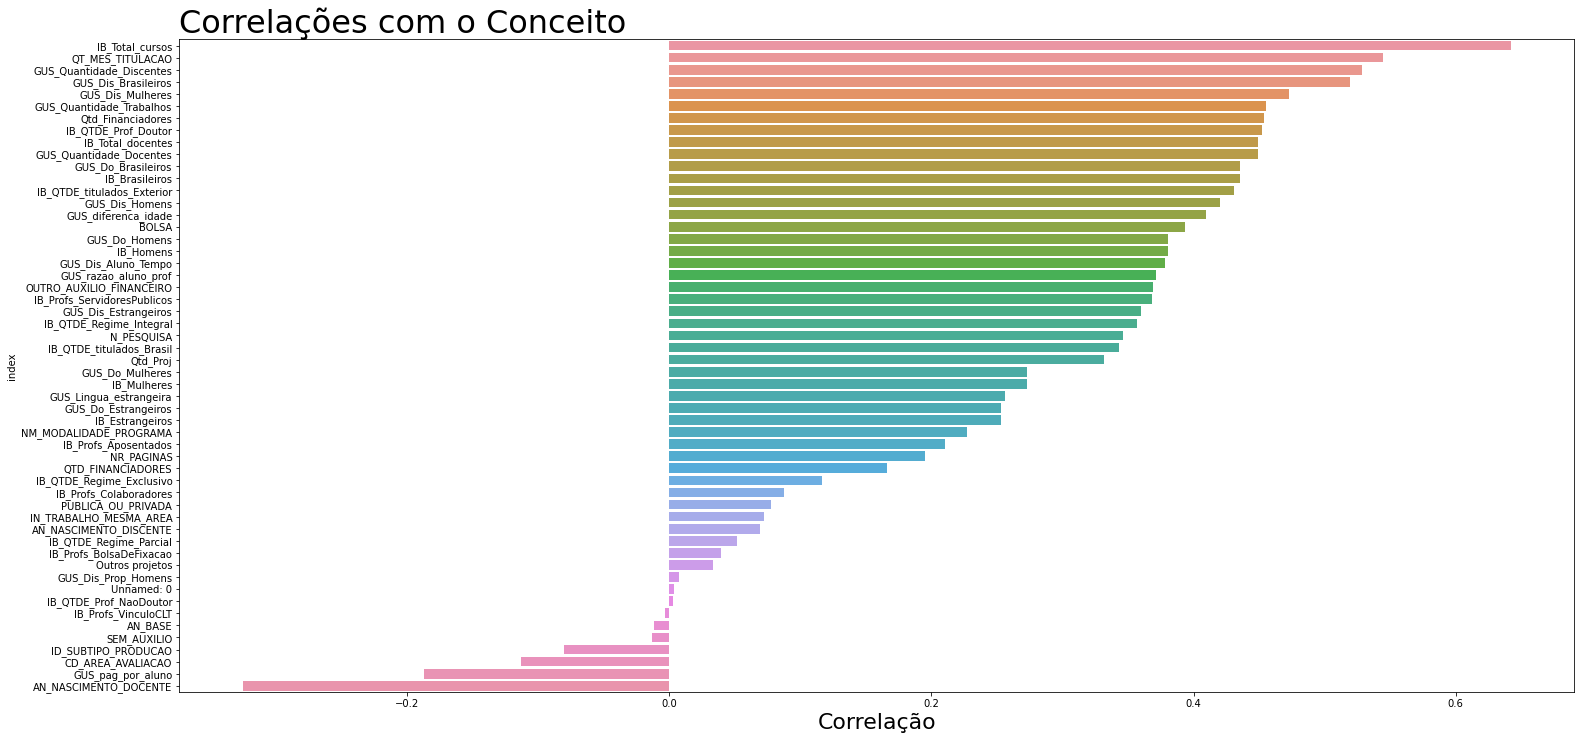

In [10]:
plt.figure(figsize = (25,12))
ax = sns.barplot(data = conceito_corr, y = 'index', x = 'CONCEITO_PROGRAMA')
plt.title("Correlações com o Conceito", fontsize = 32, loc = 'left')
plt.xlabel("Correlação", fontsize = 22)
ax = ax 

In [11]:
conceito_corr['ABS_CONCEITO_PROGRAMA'] = np.abs(conceito_corr['CONCEITO_PROGRAMA'])

In [12]:
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'ABS_CONCEITO_PROGRAMA', ascending = False)

In [13]:
features_com_maior_correlacao = list(conceito_corr.head(10)['index'])
features_com_maior_correlacao

['IB_Total_cursos',
 'QT_MES_TITULACAO',
 'GUS_Quantidade_Discentes',
 'GUS_Dis_Brasileiros',
 'GUS_Dis_Mulheres',
 'GUS_Quantidade_Trabalhos',
 'Qtd_Financiadores',
 'IB_QTDE_Prof_Doutor',
 'IB_Total_docentes',
 'GUS_Quantidade_Docentes']

# Clusterização

In [14]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [51]:
X = df.copy() 

In [52]:
X = X.select_dtypes(exclude = 'object')
X =X.dropna(axis=1)

In [53]:
X.head()

AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  IB_Homens  \
0     2013                  3                 25           10         15   
1     2014                  3                 22            8         14   
2     2015                  3                 22            8         14   
3     2016                  3                 20            7         13   
4     2017                  4                 22            8         14   

   IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
0              25                0                      16   
1              22                0                      16   
2              22                0                      15   
3              20                0                      14   
4              22                0                      16   

   IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  \
0                        9                         0                   25   
1                        6                         0                   22   
2                        5                         2                   22   
3                        4                         2                   20   
4                        4                         2                   22   

   IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
0                       0                        23   
1                       0                        20   
2                       0                        20   
3                       0                        18   
4                       0                        20   

   IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
0                           2                      12   
1                           2                      12   
2                           2                      12   
3                           2                      11   
4                           2                      12   

   IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  IB_Profs_Aposentados  \
0                            8                    2                     3   
1                            7                    0                     3   
2                            9                    0                     1   
3                            8                    0                     1   
4                            9                    0                     1   

   IB_Profs_BolsaDeFixacao  IB_Total_cursos  MEDIA_CONCEITO_CURSO  \
0                        0                2                   3.0   
1                        0                2                   3.0   
2                        0                2                   3.0   
3                        0                2                   3.0   
4                        0                2                   4.0   

   ID_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  GUS_Lingua_estrangeira  \
0                  2.0                     0.0                       0   
1                  2.0                     1.0                       0   
2                  2.0                     0.0                       0   
3                  2.0                     0.0                       0   
4                  2.0                     1.0                       0   

   GUS_Quantidade_Trabalhos  GUS_Do_Homens  GUS_Do_Mulheres  \
0                        21             15               10   
1                        13             14                8   
2                        20             14                8   
3                        18             13                7   
4                        21             14                8   

   GUS_Do_Brasileiros  GUS_Do_Estrangeiros  GUS_Quantidade_Docentes  \
0                  25                    0                       25   
1                  22                    0                       22   
2                  22                    0                       22   
3                  20                    0        

In [18]:
scaler = preprocessing.StandardScaler()

np_X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(np_X, columns= X.columns)


In [20]:
X_raw_clustering=scaled_X.copy()

km = KMeans(n_clusters=3)
km.fit(X_raw_clustering)

X_raw_clustering['labels'] = km.labels_

In [23]:
X_raw_clustering.head()

AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  IB_Homens  \
0 -1.568001          -1.041831           0.219810     0.078066   0.231695   
1 -0.979394          -1.041831          -0.048554    -0.214189   0.111211   
2 -0.390787          -1.041831          -0.048554    -0.214189   0.111211   
3  0.197819          -1.041831          -0.227463    -0.360317  -0.009272   
4  0.786426          -0.141521          -0.048554    -0.214189   0.111211   

   IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
0        0.287197        -0.519573                4.663451   
1        0.009500        -0.519573                4.663451   
2        0.009500        -0.519573                4.334073   
3       -0.175632        -0.519573                4.004694   
4        0.009500        -0.519573                4.663451   

   IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  \
0                -0.615085                 -0.614347             0.234986   
1                -0.887874                 -0.614347            -0.035062   
2                -0.978804                 -0.365457            -0.035062   
3                -1.069733                 -0.365457            -0.215094   
4                -1.069733                 -0.365457            -0.035062   

   IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
0               -0.239019                  0.373646   
1               -0.239019                  0.066018   
2               -0.239019                  0.066018   
3               -0.239019                 -0.139067   
4               -0.239019                  0.066018   

   IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
0                   -0.305029                 5.51647   
1                   -0.305029                 5.51647   
2                   -0.305029                 5.51647   
3                   -0.305029                 5.00794   
4                   -0.305029                 5.51647   

   IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  IB_Profs_Aposentados  \
0                    -0.773164            -0.188458              2.293196   
1                    -0.853342            -0.508153              2.293196   
2                    -0.692985            -0.508153              0.536926   
3                    -0.773164            -0.508153              0.536926   
4                    -0.692985            -0.508153              0.536926   

   IB_Profs_BolsaDeFixacao  IB_Total_cursos  MEDIA_CONCEITO_CURSO  \
0                -0.184461         0.811068             -1.046957   
1                -0.184461         0.811068             -1.046957   
2                -0.184461         0.811068             -1.046957   
3                -0.184461         0.811068             -1.046957   
4                -0.184461         0.811068             -0.144965   

   ID_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  GUS_Lingua_estrangeira  \
0            -0.114891               -2.114267               -0.207709   
1            -0.114891                0.472977               -0.207709   
2            -0.114891               -2.114267               -0.207709   
3            -0.114891               -2.114267               -0.207709   
4            -0.114891                0.472977               -0.207709   

   GUS_Quantidade_Trabalhos  GUS_Do_Homens  GUS_Do_Mulheres  \
0                  0.009415       0.231695         0.078059   
1                 -0.511359       0.111211        -0.214195   
2                 -0.055682       0.111211        -0.214195   
3                 -0.185875      -0.009272        -0.360321   
4                  0.009415       0.111211        -0.214195   

   GUS_Do_Brasileiros  GUS_Do_Estrangeiros  GUS_Quantidade_Docentes  \
0            0.287197            -0.519573                 0.219810   
1            0.009500            -0.519573                -0.048554   
2            0.009500            -0.519573                -0.048554   
3           -0.175632            -0.519573   

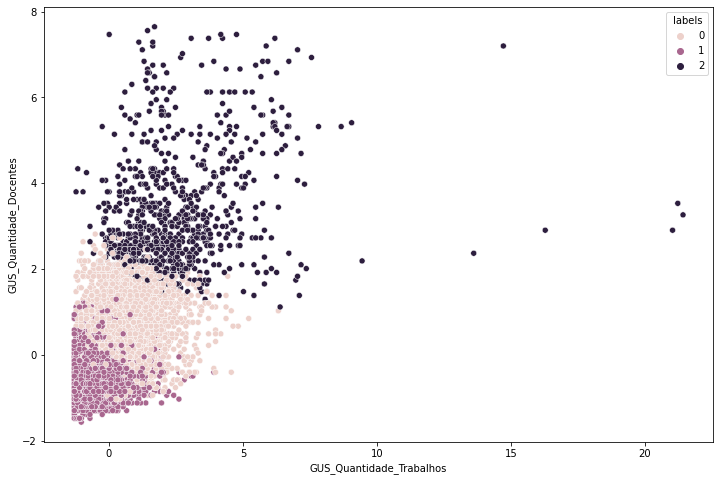

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = X_raw_clustering, x = 'GUS_Quantidade_Trabalhos', y = 'GUS_Quantidade_Docentes', hue = 'labels')
plt.show()

# PCA

In [58]:
PCA_func = PCA(n_components=2)
dados_pca = PCA_func.fit_transform(scaled_X)

dados_pca = pd.DataFrame(dados_pca)

km_pca = KMeans(n_clusters=3)
km_pca.fit(dados_pca)

dados_pca_analysis=dados_pca.copy()
dados_pca_analysis['labels'] = km_pca.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

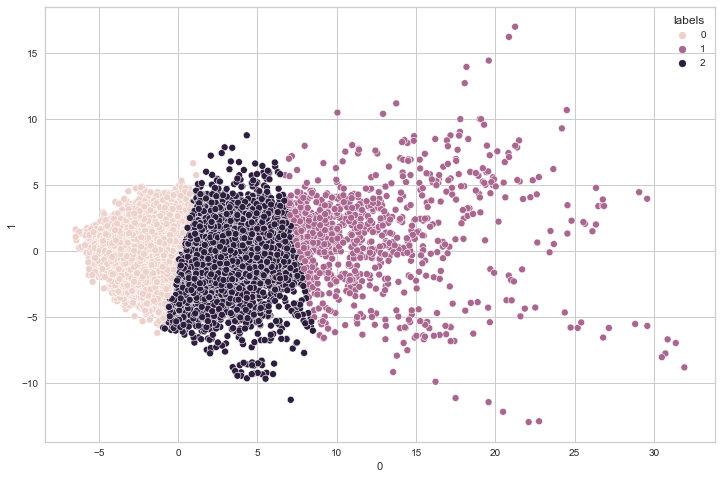

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = dados_pca_analysis, x = 0, y = 1, hue = 'labels')

## Caminho contrário

In [75]:
km_pca = KMeans(n_clusters=4)
km_pca.fit(scaled_X)

PCA_func = PCA(n_components=2)
dados_pca = PCA_func.fit_transform(scaled_X)

dados_pca = pd.DataFrame(dados_pca)

dados_pca_analysis=dados_pca.copy()
dados_pca_analysis['labels'] = km_pca.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

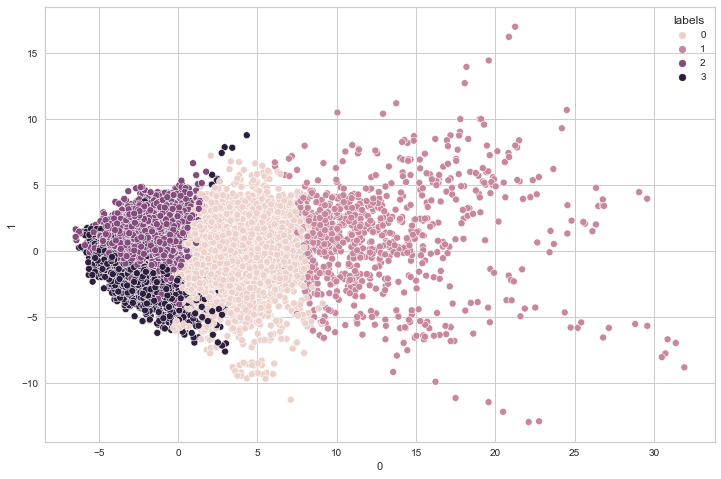

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = dados_pca_analysis, x = 0, y = 1, hue = 'labels')

# Otimizando a clusterização

## Sem PCA

In [36]:
faixa_n_clusters = list(range(2,10))

valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters= k)
    labels = agrupador.fit_predict(X_raw_clustering)
    media_silhueta = silhouette_score(X_raw_clustering, labels)
    valores_silhueta.append(media_silhueta)

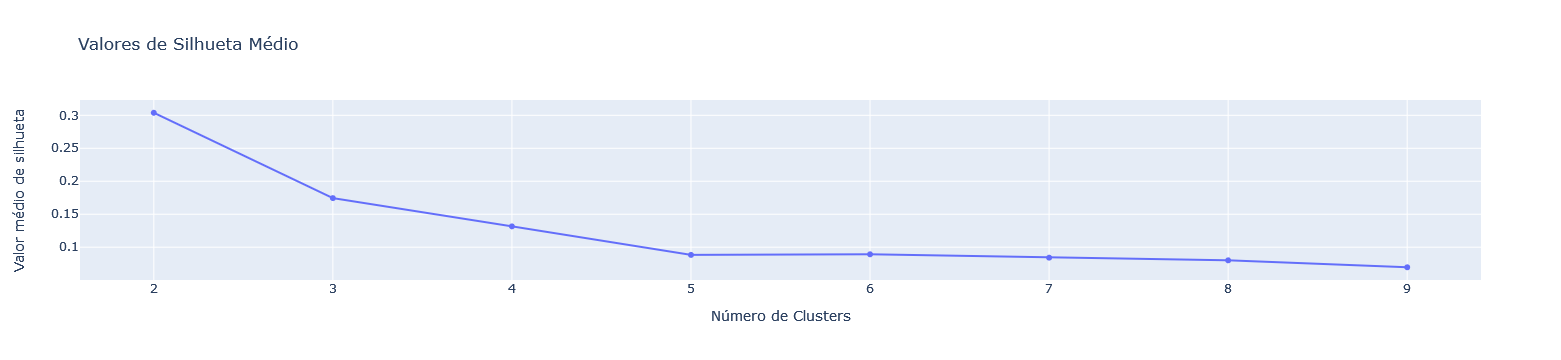

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médio",
    xaxis_title = "Número de Clusters",
    yaxis_title = "Valor médio de silhueta"
)
fig.show()

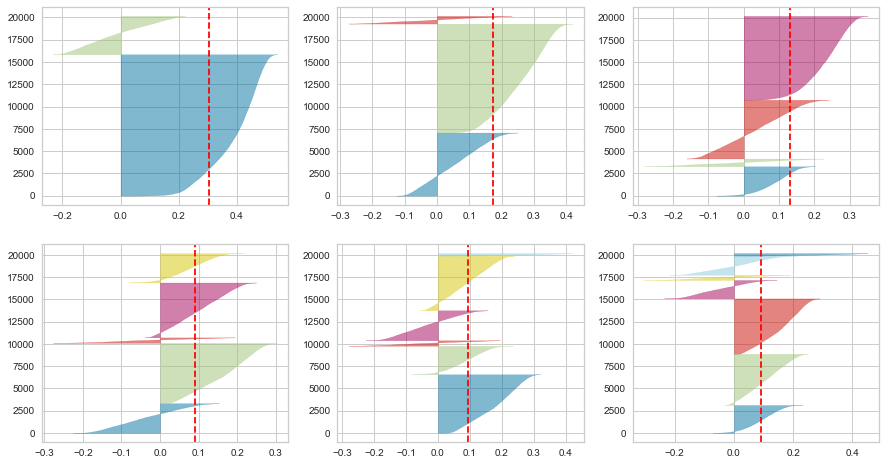

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for k in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k+1, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_raw_clustering)

## Com PCA

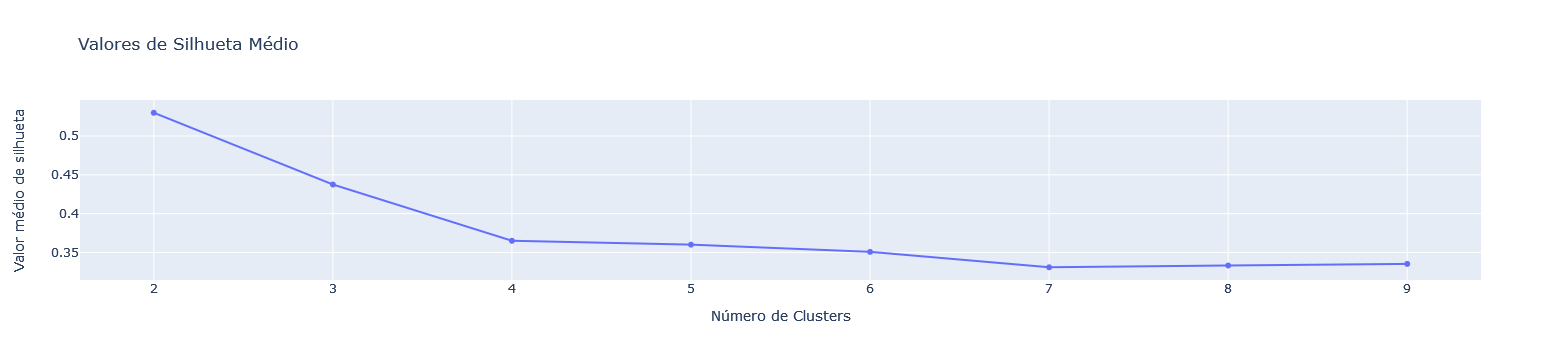

In [61]:
faixa_n_clusters = list(range(2,10))

valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters= k)
    labels = agrupador.fit_predict(dados_pca)
    media_silhueta = silhouette_score(dados_pca, labels)
    valores_silhueta.append(media_silhueta)
    
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médio",
    xaxis_title = "Número de Clusters",
    yaxis_title = "Valor médio de silhueta"
)
fig.show()

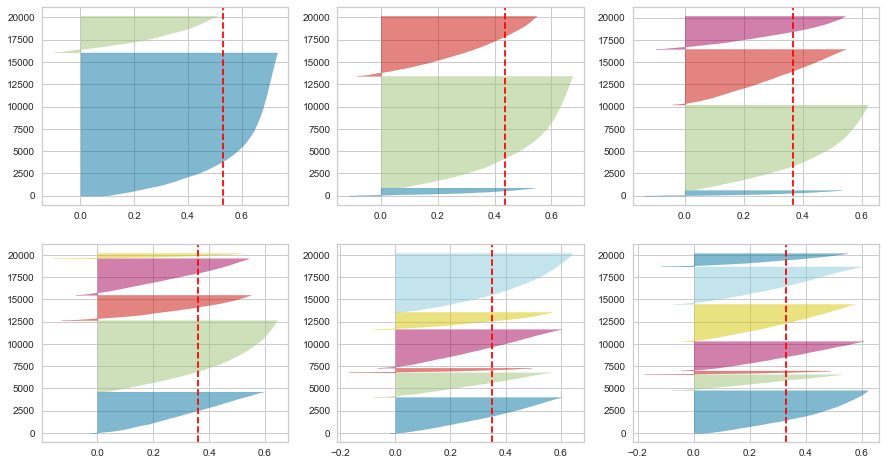

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 3, figsize=(15,8))
for k in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k+1, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dados_pca)

# Analisando os clusters

In [67]:
km_pca = KMeans(n_clusters=4)
km_pca.fit(dados_pca)

df['labels'] = km_pca.labels_

In [68]:
df.head()

CD_PROGRAMA_IES  AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  \
0   10001018002P1     2013                  3                 25           10   
1   10001018002P1     2014                  3                 22            8   
2   10001018002P1     2015                  3                 22            8   
3   10001018002P1     2016                  3                 20            7   
4   10001018002P1     2017                  4                 22            8   

   IB_Homens  IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
0         15              25                0                      16   
1         14              22                0                      16   
2         14              22                0                      15   
3         13              20                0                      14   
4         14              22                0                      16   

   IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  \
0                        9                         0                   25   
1                        6                         0                   22   
2                        5                         2                   22   
3                        4                         2                   20   
4                        4                         2                   22   

   IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
0                       0                        23   
1                       0                        20   
2                       0                        20   
3                       0                        18   
4                       0                        20   

   IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
0                           2                      12   
1                           2                      12   
2                           2                      12   
3                           2                      11   
4                           2                      12   

   IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  IB_Profs_Aposentados  \
0                            8                    2                     3   
1                            7                    0                     3   
2                            9                    0                     1   
3                            8                    0                     1   
4                            9                    0                     1   

   IB_Profs_BolsaDeFixacao  IB_Total_cursos  MEDIA_CONCEITO_CURSO  \
0                        0                2                   3.0   
1                        0                2                   3.0   
2                        0                2                   3.0   
3                        0                2                   3.0   
4                        0                2                   4.0   

   ID_SUBTIPO_PRODUCAO NM_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  \
0                  2.0                TESE                     0.0   
1                  2.0                TESE                     1.0   
2                  2.0                TESE                     0.0   
3                  2.0                TESE                     0.0   
4                  2.0                TESE                     1.0   

   NR_PAGINAS  GUS_Lingua_estrangeira  GUS_Quantidade_Trabalhos  \
0         NaN                       0                        21   
1        80.0                       0                        13   
2         NaN                       0                        20   
3         NaN                       0                        18   
4         NaN                       0                        21   

   GUS_Do_Homens  GUS_Do_Mulheres  GUS_Do_Brasileiros  GUS_Do_Estrangeiros  \
0             15               10                  25                    0   
1             14                8                  22                    0   
2  

In [70]:
df.groupby('labels').mean()

AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  \
labels                                                                   
0       2015.749687           3.370675          17.066173     7.586182   
1       2015.669735           5.048728          34.095019    14.769626   
2       2015.576299           5.805195          64.599026    25.639610   
3       2015.537129           4.676664          19.972253     7.618284   

        IB_Homens  IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
labels                                                                       
0        9.479992       16.757607         0.308566                1.605773   
1       19.325393       32.936925         1.158094                2.695452   
2       38.957792       62.362013         2.237013                4.754870   
3       12.353970       19.269447         0.702807                1.411067   

        IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  \
labels                                                      
0                     11.269070                  4.191330   
1                     23.595290                  7.804277   
2                     45.566558                 14.277597   
3                     15.099118                  3.462069   

        IB_QTDE_Prof_Doutor  IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
labels                                                                          
0                 16.929137                0.137036                 15.523030   
1                 33.886031                0.208988                 28.880076   
2                 64.084416                0.514610                 52.831169   
3                 19.862711                0.109543                 16.305854   

        IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
labels                                                       
0                         1.543143                0.971863   
1                         5.214943                1.833514   
2                        11.767857                2.612013   
3                         3.666399                0.881636   

        IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  \
labels                                                     
0                         12.898916             2.891830   
1                         29.418517             1.816459   
2                         56.264610             3.068182   
3                         14.152205             4.439134   

        IB_Profs_Aposentados  IB_Profs_BolsaDeFixacao  IB_Total_cursos  \
labels                                                                   
0                   0.140579                 0.162880         1.242705   
1                   0.812669                 0.213860         1.922577   
2                   2.034091                 0.620130         1.939935   
3                   0.356375                 0.142743         1.935525   

        MEDIA_CONCEITO_CURSO  ID_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  \
labels                                                                      
0                   3.377293             3.161005                0.782618   
1                   5.049404             2.150244                0.822956   
2                   5.805195             2.655844                0.806818   
3                   4.677466             2.016359                0.868003   

        NR_PAGINAS  GUS_Lingua_estrangeira  GUS_Quantidade_Trabalhos  \
labels                                                                 
0       110.502366                0.065444                 12.818362   
1       136.467892                0.708446                 31.487818   
2       139.949209                3.436688                 64.490260   
3       129.004864                0.602566                 22.614435   

        GUS_Do_Homens  GUS_Do_Mulheres  GUS_Do_Brasileiros  \
labels                                                       
0            9.479992         7.586182       

<AxesSubplot:xlabel='GUS_Quantidade_Docentes', ylabel='GUS_Quantidade_Trabalhos'>

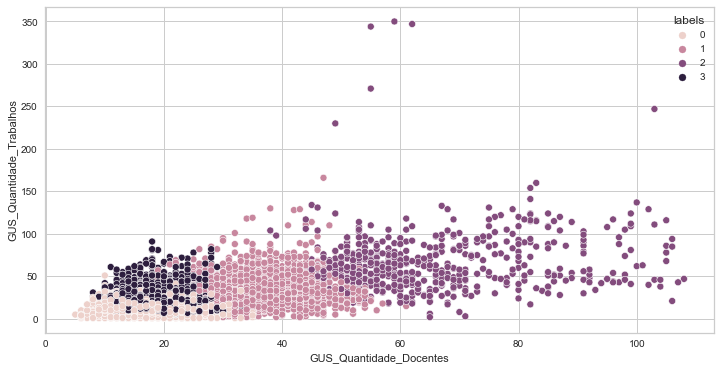

In [71]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='GUS_Quantidade_Docentes', y='GUS_Quantidade_Trabalhos', hue='labels')

In [78]:
df['RELAT_MULHERES'] = df['GUS_Do_Mulheres']/df['GUS_Quantidade_Docentes']

<AxesSubplot:xlabel='GUS_Quantidade_Docentes', ylabel='RELAT_MULHERES'>

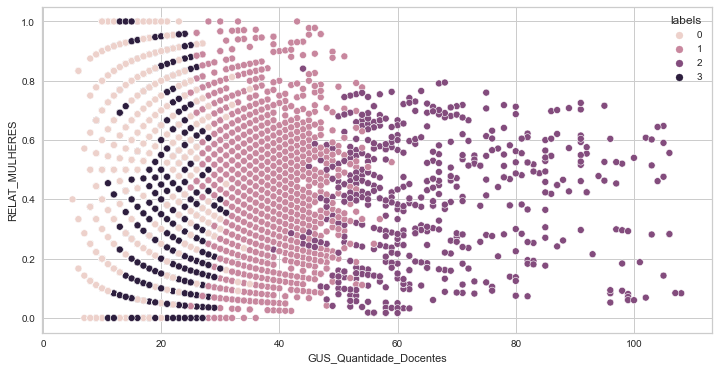

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='GUS_Quantidade_Docentes', y='RELAT_MULHERES', hue='labels')

In [77]:
df.head()

CD_PROGRAMA_IES  AN_BASE  CONCEITO_PROGRAMA  IB_Total_docentes  IB_Mulheres  \
0   10001018002P1     2013                  3                 25           10   
1   10001018002P1     2014                  3                 22            8   
2   10001018002P1     2015                  3                 22            8   
3   10001018002P1     2016                  3                 20            7   
4   10001018002P1     2017                  4                 22            8   

   IB_Homens  IB_Brasileiros  IB_Estrangeiros  IB_QTDE_Regime_Parcial  \
0         15              25                0                      16   
1         14              22                0                      16   
2         14              22                0                      15   
3         13              20                0                      14   
4         14              22                0                      16   

   IB_QTDE_Regime_Integral  IB_QTDE_Regime_Exclusivo  IB_QTDE_Prof_Doutor  \
0                        9                         0                   25   
1                        6                         0                   22   
2                        5                         2                   22   
3                        4                         2                   20   
4                        4                         2                   22   

   IB_QTDE_Prof_NaoDoutor  IB_QTDE_titulados_Brasil  \
0                       0                        23   
1                       0                        20   
2                       0                        20   
3                       0                        18   
4                       0                        20   

   IB_QTDE_titulados_Exterior  IB_Profs_Colaboradores  \
0                           2                      12   
1                           2                      12   
2                           2                      12   
3                           2                      11   
4                           2                      12   

   IB_Profs_ServidoresPublicos  IB_Profs_VinculoCLT  IB_Profs_Aposentados  \
0                            8                    2                     3   
1                            7                    0                     3   
2                            9                    0                     1   
3                            8                    0                     1   
4                            9                    0                     1   

   IB_Profs_BolsaDeFixacao  IB_Total_cursos  MEDIA_CONCEITO_CURSO  \
0                        0                2                   3.0   
1                        0                2                   3.0   
2                        0                2                   3.0   
3                        0                2                   3.0   
4                        0                2                   4.0   

   ID_SUBTIPO_PRODUCAO NM_SUBTIPO_PRODUCAO  IN_TRABALHO_MESMA_AREA  \
0                  2.0                TESE                     0.0   
1                  2.0                TESE                     1.0   
2                  2.0                TESE                     0.0   
3                  2.0                TESE                     0.0   
4                  2.0                TESE                     1.0   

   NR_PAGINAS  GUS_Lingua_estrangeira  GUS_Quantidade_Trabalhos  \
0         NaN                       0                        21   
1        80.0                       0                        13   
2         NaN                       0                        20   
3         NaN                       0                        18   
4         NaN                       0                        21   

   GUS_Do_Homens  GUS_Do_Mulheres  GUS_Do_Brasileiros  GUS_Do_Estrangeiros  \
0             15               10                  25                    0   
1             14                8                  22                    0   
2  